In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

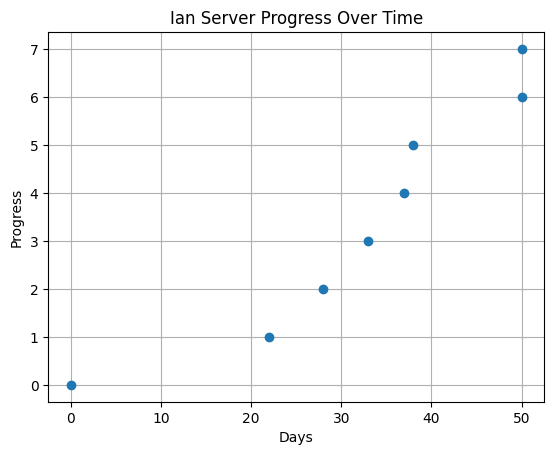

In [2]:
dates = np.array(["11/22/25 11:37 AM",
"12/14/25 5:10 PM",
"12/20/25 2:19 PM",
"12/25/25 6:40 PM",
"12/29/25 7:49 PM",
"12/30/25 11:28 PM", 
"1/11/26 8:01 PM", 
"1/11/26 11:05 PM"])
formatted_dates = np.array([])
for d in dates:
    formatted_dates = np.append(formatted_dates, pd.to_datetime(d))

days_elapsed = np.array([])
for d in formatted_dates:
    diff = (d - formatted_dates[0]).days
    days_elapsed = np.append(days_elapsed, diff)


progress = np.arange(len(dates))

plt.scatter(days_elapsed, progress, zorder=10)
plt.xlabel("Days")
plt.ylabel("Progress")
plt.title("Ian Server Progress Over Time");
plt.grid(True);

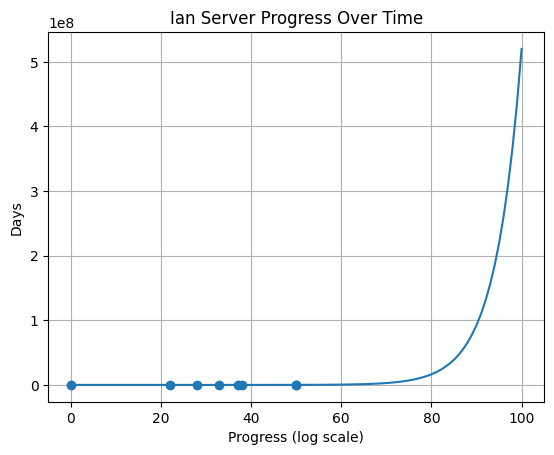

In [38]:
def f(progress, a, b):
    return a * np.exp(b * progress)

params = curve_fit(f, progress, days_elapsed)[0]

# Plotting
plt.scatter(days_elapsed, progress, zorder=10)
plt.plot(np.arange(101), f(np.arange(101), *params))
plt.xlabel("Progress (log scale)")
plt.ylabel("Days")
plt.title("Ian Server Progress Over Time");
plt.grid(True);

In [40]:
f(np.arange(101), *params)[-1]

np.float64(519979273.261571)

In [47]:
formatted_dates[0] + pd.Timedelta(days=519979273.261571)

OutOfBoundsTimedelta: seconds=44926209209799735771136, milliseconds=0, microseconds=0, nanoseconds=0

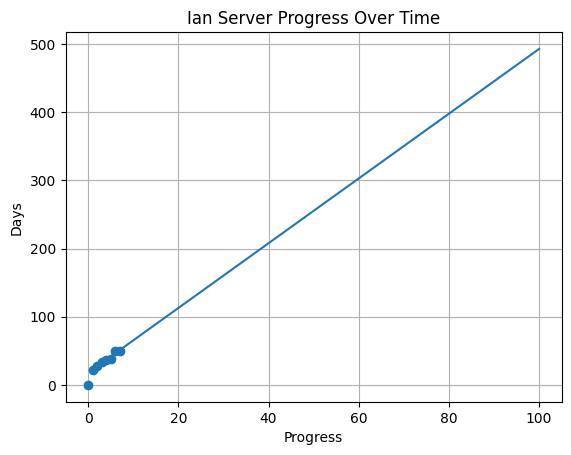

In [9]:
def f_lin(progress, a, b):
    return a * progress + b

params = curve_fit(f_lin, progress[1:], days_elapsed[1:])[0]

# Plotting
plt.scatter(progress, days_elapsed, zorder=10)
plt.plot(np.arange(1,101), f_lin(np.arange(1,101), *params))
plt.xlabel("Progress")
plt.ylabel("Days")
plt.title("Ian Server Progress Over Time");
plt.grid(True);